In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
####################################################
# Load training and testing data
(train_data, test_data), ds_info = tfds.load(
    name="food101",
    split=["train", "validation"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [20]:
####################################################
# Load class names
class_names = ds_info.features["label"].names
class_names, len(class_names)

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheesecake',
  'cheese_plate',
  'chicken_curry',
  'chicken_quesadilla',
  'chicken_wings',
  'chocolate_cake',
  'chocolate_mousse',
  'churros',
  'clam_chowder',
  'club_sandwich',
  'crab_cakes',
  'creme_brulee',
  'croque_madame',
  'cup_cakes',
  'deviled_eggs',
  'donuts',
  'dumplings',
  'edamame',
  'eggs_benedict',
  'escargots',
  'falafel',
  'filet_mignon',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'french_onion_soup',
  'french_toast',
  'fried_calamari',
  'fried_rice',
  'frozen_yogurt',
  'garlic_bread',
  'gnocchi',
  'greek_salad',
  'grilled_cheese_sandwich',
  'grilled_salmon',
  'guacamole',
  'gyoza',
  'hamburger',
  'hot_and_sour_soup',
  'hot_dog',
  'huevos_rancheros',
  'hummu

Load model

In [4]:
model = tf.keras.models.load_model('foodvision_model.keras')

c:\Users\mazen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 23 variables whereas the saved optimizer has 48 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import hashlib


def predictNameFromFoodImage(image_url:str, img_size=(224, 224)):
    unique_name = hashlib.md5(image_url.encode()).hexdigest()
    image_path = tf.keras.utils.get_file(f"temp_image_{unique_name}", origin=image_url)

    img = tf.keras.utils.load_img(image_path, target_size=img_size)
    img_array = tf.keras.utils.img_to_array(img)

    expanded_img = tf.expand_dims(img_array, 0)  # Create a batch
    predictions = model.predict(expanded_img)
    score = tf.nn.softmax(predictions[0])
    
    food_class = class_names[np.argmax(score)]
    print(f"This food is most likely {food_class}.")
    
    plt.imshow(img_array / 255)
    plt.title(food_class)
    plt.axis("off")
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
This food is most likely pizza.


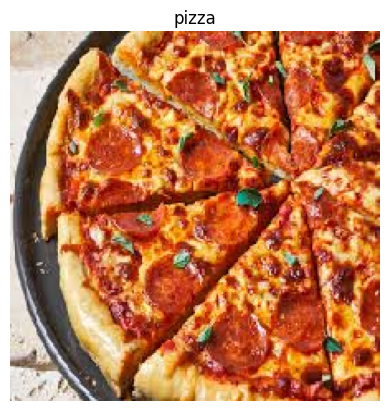

In [39]:
predictNameFromFoodImage(
    image_url="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSeo_JMT1ZvwUNMHneItLQcNgYbwRsSs2mqYA&s"
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


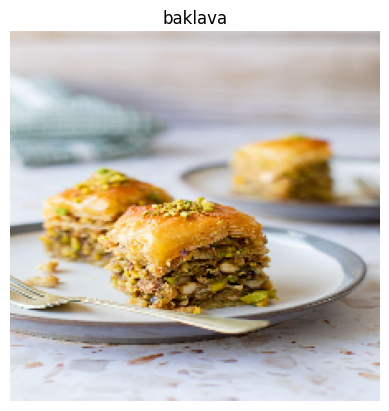

'This food is most likely baklava.'

In [7]:
predictNameFromFoodImage(
    image_url="https://www.simplyrecipes.com/thmb/3S8HtOSKvpoQmw4wgo5yCW2qjVE=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/Simply-Recipes-Baklava-LEAD-11-b2a228e6db9f43d697ae3aed378d0b2a.jpg"
)

In [10]:
def getImageFromFoodName(
    food_class: str, test_data, target_size=(224, 224)
):

    if food_class in class_names:
        class_index = class_names.index(food_class)

        for image, label in test_data:
            label_index = label.numpy()
            if label_index == class_index:  
                plt.imshow(image.numpy() / 255.0)
                plt.title(class_names[label_index])
                plt.axis("off")
                plt.show()
                return

    return f"No images found for class: {food_class}"

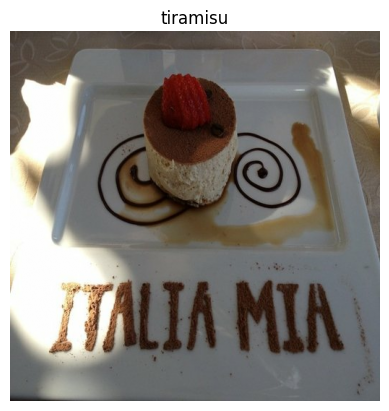

In [26]:
getImageFromFoodName("tiramisu", train_data)

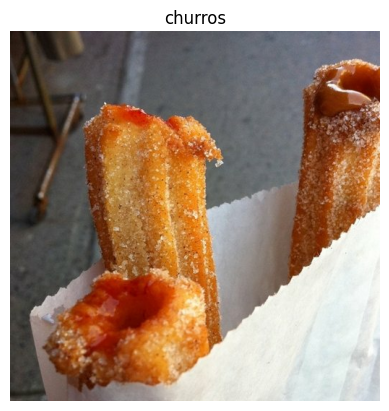

In [37]:
getImageFromFoodName("churros", test_data)